In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from utils.plotter import plot_examples
import os, glob

### Load the dataset and check head, total examples

In [95]:
IMG_DIR = '../data/classification-assignment/images/'
CSV_FILE = '../data/classification-assignment/attributes.csv'

In [110]:
# load the csv file
df = pd.read_csv(CSV_FILE)

# total number of examples
print(f'Total no of files: {nexamples}')
nexamples = df.shape[0]
df.head()

Total no of files: 1797


,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,11479107741104-Tommy-Hilfiger-Men-Navy-Blue-St...,6.0,1.0,9.0
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
4,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0


### Check whether each image id has image in the IMG_DIR

In [111]:
# check rows which has no image in dataset and drop them
drop_indices = []
count = 0
for idx in range(nexamples):
    if not os.path.exists(f'{IMG_DIR}{df.filename[idx]}'):
        #print(f'idx: {idx} {df.filename[idx]} not found!')
        drop_indices.append(idx)
df.drop(df.index[drop_indices], inplace=True)

# reset_index
df.reset_index(drop=True, inplace=True)

#print total examples
nexamples = df.shape[0]
print(f'Total no of usuable examples: {nexamples}')

df.head()

Total no of usuable examples: 1797


,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
3,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0
4,11505295751483-FOREVER-21-Men-White-Self-Desig...,1.0,3.0,NaN


In [112]:
# Check total number of images in IMG_dir and indices in df
img_list = [os.path.basename(i) for i in glob.glob(f'{IMG_DIR}*.jpg')]
print(f'Total number of jpeg files in {IMG_DIR}: {len(img_list)}')
print(f'Total number of rows in df: {nexamples}')

Total number of jpeg files in ../data/classification-assignment/images/: 1782
Total number of rows in df: 1797


In [114]:
# unique image names in df
print(f'unique filenames in df: {df.filename.unique().shape[0]}')


unique filenames in df: 1782


#### Therefore, it implies that we have same image ids that refer to same image in the IMG_DIR

### Plot some images with attributes

769 ../data/classification-assignment/images/11521190743717-Nautica-Men-White-Solid-Polo-Collar-T-shirt-6311521190743564-3.jpg
(300, 225, 3)
1747 ../data/classification-assignment/images/11509448670594-Kook-N-Keech-Men-Tshirts-7891509448670445-2.jpg
(300, 225, 3)
165 ../data/classification-assignment/images/Jack--Jones-White--Green-Printed-Polo-T-shirt_2_6dd043e9bb8a18dd165c44bb0d7e0b55.jpg
(300, 225, 3)
420 ../data/classification-assignment/images/11518167960852-INVICTUS-Men-Tshirts-6611518167960746-3.jpg
(300, 225, 3)
395 ../data/classification-assignment/images/2817e4c5-285b-4e43-85f0-d79183018ada1528177151479-French-Connection-Men-Tshirts-8661528177149723-2.jpg
(300, 225, 3)
1428 ../data/classification-assignment/images/11515411536153-levis-men-blue-solid-polo-collar-t-shirt-1651515411536119-4.jpg
(300, 225, 3)
1299 ../data/classification-assignment/images/11471587145061-Breakbounce-Men-Tshirts-8251471587144836-3.jpg
(300, 225, 3)
349 ../data/classification-assignment/images/114864

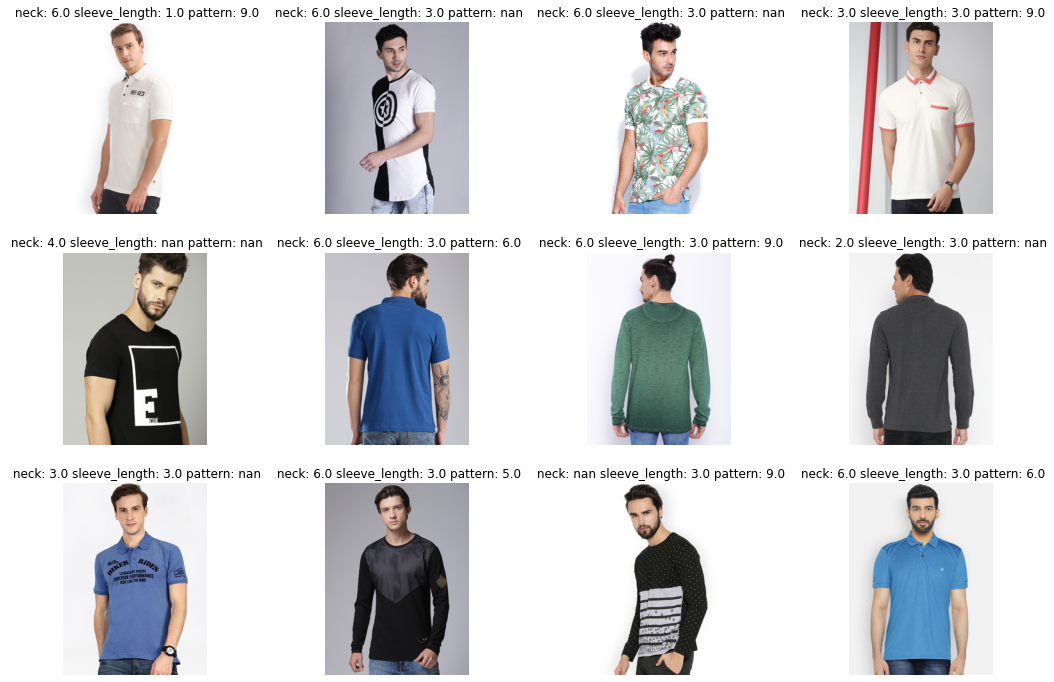

In [135]:
# plot some images with attributes
nimgs = 12
ncols = 4
idx = random.sample(range(0,nexamples), nimgs)

nrows = nimgs//ncols  
# define figure
fig_, axes=plt.subplots(nrows, ncols, figsize=(18, 12))
axes = axes.ravel()
j = 0

for i in idx:
    #print(f'Plot image idx: {i}')
    img_path = IMG_DIR + df.filename[i]
    print(i, img_path)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #print(image.shape)
    axes[j].imshow(image)
    title = ''
    for col in col_names:
        title = title + f' {col}: {df[col][i]}'
    axes[j].set_title(title, fontsize=12)
    axes[j].axis('off')
    j +=1
#plt.subplots_adjust(hspace=0.2, vspace=0.4)

#### Check the image size and verify whether each image id has corresponding image

#### Get all the unique values for each attribute

#### Get some statistics for each attribute

#### Pre-process the CSV file and generate key-values pairs (if required)
